# Implementing a Key-Value Database

In this project, we'll use the B-tree data structure from before as a building block for a fully functioning key-value store.

A key-value store is a database that operates similar to a Python dictionary. Our key-value store will work like a Python dictionary, but it will also allow users to perform range queries. Our goal will be to create an easy-to-use, flexible, and adaptable key value store that other developers could use in their projects.

We will use the `BTree` class developed previously and continuously extend its functionality.

In [38]:
from btree import BTree
import time
import csv
import matplotlib.pyplot as plt
%matplotlib

Using matplotlib backend: agg


In [17]:
# Creating the KVStore (Key-Value-Storage) class

class KVStore(BTree):

    def __init__(self):
        super().__init__(split_threshold=2)

## Overriding the Add Method

The `add()` method from the `BTree` class allows a user to add multiple entries with the same key. We don't want to have this behavior in the `KVStore`.

However, since the `KVStore` extends the `BTree` class, the `add()` method from the `BTree` is automatically available in the `KVStore`.

To fix this, we can declare a new method with the same name, `add`, inside the `KVStore`. This method will override the one from the `BTree`. The new method will now be the one that will be called.

In [18]:
# Overriding the add(method)

class KVStore(BTree):

    def __init__(self):
        super().__init__(split_threshold=2)

    def add(self, key, value):
        node = self._find_node(self.root, key)
        if node is None:
            super().add(key, value)
        else:
            for i, node_key in enumerate(node.keys):
                if node_key == key:
                    node.values[i] = value

## Testing

It's a good idea to test the implementation as we go. Let's ensure that we can add values to the `KVStore` and that if we use repeated keys, the values get replaced.

A common way to test code is to use [unit tests](https://docs.python.org/3/library/unittest.html). We aren't going to use unit tests because they weren't really made to execute inside a notebook.

An alternative is to write some code and add [assertions](https://docs.pytest.org/en/stable/how-to/assert.html) that ensure that the state of the object is what it should be. An assertion is a Boolean expression that should be true. If it isn't, it will result in an exception, and we'll know something is wrong with our code.

We also added a message. This message will print if the assertion isn't verified. 

In [19]:
# Testing the split_threshold of KVStore (should be 2)

kv = KVStore()
assert kv.split_threshold == 2, "The split is not equal to 2."

Nothing gets printed, so this test is passed. 
Let's test whether if we add a certain value using `KVStore.add()` and retrieve it using `KVStore.get_value()`, we get the same value that was added.

In [20]:
# Testing KVStore.add() and KVStore.get_value()

kv.add(1, "a")
kv.add(2, "b")
kv.add(3, "c")

assert kv.get_value(1) == "a", "The value for key 1 should be 'a'."
assert kv.get_value(2) == "b", "The value for key 2 should be 'b'."
assert kv.get_value(3) == "c", "The value for key 3 should be 'c'."
assert kv.get_value(4) == None, "The value for key 4 should be None."

Again, the test is passed. 
Let's see if it correctly updates in case we add two entries with the same key but different values.

In [21]:
# Testing whether value is updated when adding an entry with the same key

kv.add(1, "aha")
assert kv.get_value(1) == "aha", "The value for key 1 should be 'aha'."
kv.add(2, "so so")
assert kv.get_value(2) == "so so", "The value for key 2 should be 'so so'."

This also seems to work.

##  Implementing the Item Getter and Setter

By now, we know that we can use the key-value store to add entries and retrieve values.

Let's make the `KVStore` easier to use by allowing users to use the bracket syntax to add entries and retrieve values.

For this, we need to implement the `__getitem__()` method and the `__setitem__()` method. The `__getitem__()` method should call the `get_value()` method, and the `__setitem__()` should call the `add()` method.

In [22]:
# Implementing the __getitem__() and __setitem__() methods

class KVStore(BTree):

    def __init__(self):
        super().__init__(split_threshold=2)

    def add(self, key, value):
        node = self._find_node(self.root, key)
        if node is None:
            super().add(key, value)
        else:
            for i, node_key in enumerate(node.keys):
                if node_key == key:
                    node.values[i] = value

    def __getitem__(self, key):
        return self.get_value(key)
    
    def __setitem__(self, key, value):
        self.add(key, value)        

In [23]:
kv = KVStore()
kv[2] = 10
print(kv[2])

10


## Testing Getter and Setter

Let's run the same tests we did before but using the bracket syntax.

In [24]:
kv = KVStore()
kv[1] = "a"
kv[2] = "b"
kv[3] = "c"

assert kv[1] == "a", "The value for key 1 should be 'a'."
assert kv[2] == "b", "The value for key 2 should be 'b'."
assert kv[3] == "c", "The value for key 3 should be 'c'."
assert kv[4] == None, "The value for key 4 should be None."

The tests are passed, using the bracketed syntax. Let's also try whether the values for identical keys are pdated correctly.

In [25]:
# Testing whether value is updated when adding an entry with the same key

kv[1] = "aha"
assert kv[1] == "aha", "The value for key 1 should be 'aha'."
kv[2] = "so so"
assert kv[2] == "so so", "The value for key 2 should be 'so so'."

Yep, it works.

## Enhancing the Contains Method

Another nice feature of the dictionary is the ability to use the `in` operator to check whether a given key is stored.

To enable this operator on a custom class, we need to implement the `__contains__()` method that checks whether a given key is contained in the data structure.

We already have a method called `contains()` inherited from the `BTree` class with that functionality. We can enable the in operator by implementing a method named `__contains__()` that calls the existing `contains()` method.

In [28]:
# Implementing the __contains__() method

class KVStore(BTree):

    def __init__(self):
        super().__init__(split_threshold=2)

    def add(self, key, value):
        node = self._find_node(self.root, key)
        if node is None:
            super().add(key, value)
        else:
            for i, node_key in enumerate(node.keys):
                if node_key == key:
                    node.values[i] = value

    def __getitem__(self, key):
        return self.get_value(key)
    
    def __setitem__(self, key, value):
        self.add(key, value)
        
    def __contains__(self, key):
        return self.contains(key)

## Testing the In Operator

Let's see if this works as intended.

In [29]:
kv = KVStore()
kv['a'] = 1
kv['b'] = 2
kv['c'] = 3

print('a' in kv)
print('d' in kv)

True
False


It does.

## Range Queries

So far, we've implemented the same functionality as a dictionary. Now it is time to make it more powerful by implementing range queries.

However, our previous implementation assumes that the keys are numeric by representing the node interval with two numbers. Initially, the interval it set was `float('-inf')` to `float('inf')`. This means that if we use strings as keys, we'll get an error because we can't compare a float to a string.

To make the implementation more general, we need to change the representation of infinity. 

Here, we choose to set the range between `""` (empty string) and `ffff` (very high value unicode character that is unassigned) in case the range query is for two strings. If to numeric values are given, we still use `float('-inf')` and `float('inf')`as initial query range.

In [30]:
# Allowing strings in range queries

class KVStore(BTree):

    def __init__(self):
        super().__init__(split_threshold=2)

    def add(self, key, value):
        node = self._find_node(self.root, key)
        if node is None:
            super().add(key, value)
        else:
            for i, node_key in enumerate(node.keys):
                if node_key == key:
                    node.values[i] = value

    def __getitem__(self, key):
        return self.get_value(key)

    def __setitem__(self, key, value):
        self.add(key, value)

    def __contains__(self, key):
        return self.contains(key)

    def _range_query(self, range_start, range_end, current_node, min_key, max_key):
        if range_start > max_key or range_end < min_key:
            return []
        results = []
        for i, key in enumerate(current_node.keys):
            if range_start <= key and key <= range_end:
                results.append(current_node.values[i])
        if not current_node.is_leaf():
            for i, child in enumerate(current_node.children):
                new_min_key = current_node.keys[i - 1] if i > 0 else min_key
                new_max_key = current_node.keys[i] if i < len(current_node) else max_key
                results += self._range_query(range_start, range_end, child, new_min_key, new_max_key)
        return results

    def range_query(self, range_start, range_end):
        if isinstance(range_start, str) and isinstance(range_end, str):
            return self._range_query(range_start, range_end, self.root, "", "\uffff")
        elif isinstance(range_start, (int, float)) and isinstance(range_end, (int, float)):
            return self._range_query(range_start, range_end, self.root, float('-inf'), float('inf'))
        else:
            raise TypeError("range_start and range_end must be both strings or both numerics")

## Random Tests

It seems we finished implementing a fully functional key-value store. We should write some tests to ensure that our implementation is working as expected. One way to test data structures is to compare them with a simpler implementation that we know is correct. We perform the same operations on both and see if both provide the same results. We will use an implementation that uses a dictionary as the base data structure, `DictKVStore`, as our baseline. For this, we will insert random number sequences in bot implemenations and check whether they return the same range query results.

In [32]:
# Setting up the DictKVStore as baseline

class DictKVStore(dict):
    
    def range_query(self, range_start, range_end):
        result = []
        for key in self.keys():
            if range_start <= key and key <= range_end:
                result.append(self[key])
        return result

In [33]:
# Testing KVStore against DictKVStore

dict_kv = DictKVStore()
our_kv = KVStore()
for i in range(10):
    dict_kv[i] = i
    our_kv[i] = i

for range_start, range_end in [(1, 3), (4, 6), (1, 10), (5, 5)]:
    dict_res = sorted(dict_kv.range_query(range_start, range_end))
    our_res = sorted(our_kv.range_query(range_start, range_end))
    assert dict_res == our_res, "Both data structures return the same range query result."

No errors are being reported. Let's now try to insert the `random`module to generate larger sets of key-value pairs.

In [35]:
# Random tests

import random
random.seed(0)

NUM_INSERTS = 10
NUM_CONTAINS = 10
NUM_RANGE_QUERIES = 10

dict_kv = DictKVStore()

kv = KVStore()

print("Testing Insertion")
for _ in range(NUM_INSERTS):
    key = random.randint(0, 100)
    value = random.randint(0, 1000000)
    dict_kv[key] = value
    kv[key] = value
    
print("Testing Length")
assert len(dict_kv) == len(kv), "Wrong length. Length should be {} but is {}.".format(len(dict_kv), len(kv))
    

print("Testing Values")
for key in dict_kv:
    assert dict_kv[key] == kv[key], "Wrong value for key {}. Expected value {} but found value {}.".format(key, dict_kv[key], kv[key])

    
print("Testing in Operator")
for i in range(NUM_CONTAINS):
    key = random.randint(0, 1000)
    assert (key in dict_kv) == (key in kv), "Contains method did not return the correct value for key {}.".format(key)


print("Testing Range Queries")
for _ in range(NUM_RANGE_QUERIES):
    range_start = random.randint(0, 100)
    range_end = random.randint(range_start, 100)
    dict_results = dict_kv.range_query(range_start, range_end)
    kv_results = kv.range_query(range_start, range_end)
    assert len(dict_results) == len(kv_results), "Wrong number of reuslt in range query [{}, {}]. Should be {} but was {}.".format(range_start, range_end, len(dict_result), len(kv_result))
    dict_results.sort()
    kv_results.sort()
    assert dict_results == kv_results, "Wrong number of reuslt in range query [{}, {}]. Should be {} but was {}.".format(range_start, range_end, len(dict_result), len(kv_result))

Testing Insertion
Testing Length
Testing Values
Testing in Operator
Testing Range Queries


Each of these tests work fine with no errors being reported. It seems to be alright!

## Performance Testing

We now also should get some insight into whether our `KVStore` implementation performs better than the simpler dictionary implementation.

We will:

1. Generate many entries (about 50,000 should be enough).
2. Generate many query intervals. It's better to generate in a way that increases the number of query results from 1 to some given value. This way, we can see the impact of the number of results in the performance gained.
3. For each query, compute the ratio between the runtime using the dictionary-based implementation and the B-tree-based implementation. A ratio of 1 means that both took the same time, a ratio of 2 means that the B-tree implementation was two times faster, and so on.
4. Plot the runtime ratios to better visualize the results.

For the test, we will use the files `entries.csv` and `queries.csv`. The `entries.csv` file contains a list of 50,000 entries, and the `queries.csv` file contains a list of 1,000 queries with results ranges from 1 to 1,000. 

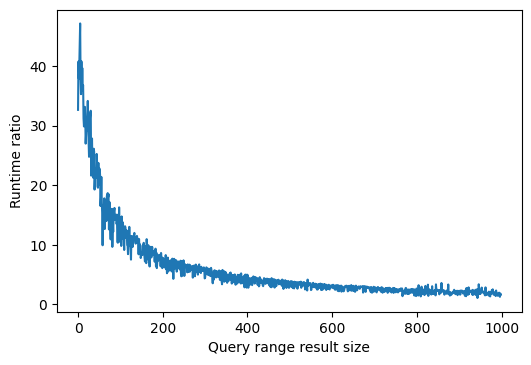

In [40]:
%matplotlib inline

dict_kv = DictKVStore()
our_kv = KVStore()

# Load the entries
with open('entries.csv', 'r') as f:
    rows = list(csv.reader(f))[1:]
    for row in rows:
        key = int(row[0])
        value = int(row[1])
        dict_kv[key] = value
        our_kv[key] = value

# Measure query times
time_ratios = []
with open('queries.csv', 'r') as f:
    rows = list(csv.reader(f))[1:]
    for row in rows:
        range_start = int(row[0])
        range_end = int(row[1])
        
        start = time.time()
        dict_kv.range_query(range_start, range_end)
        end = time.time()
        time_dict = end - start

        start = time.time()
        our_kv.range_query(range_start, range_end)
        end = time.time()
        time_kv = end - start

        time_ratios.append(time_dict / time_kv)

# Plot results

plt.plot(time_ratios)
plt.xlabel('Query range result size')
plt.ylabel('Runtime ratio')
plt.show()

We see that the performance boost with 50,000 entries is up to 50 times faster in our implementation than with the dictionary implementation. However, the performance advantage decreases the larger the query ranges become.